In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

In [2]:
# Loading the data set
df = pd.read_csv('pulsar_stars.csv')

# Exploring the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [3]:
# Checking dimensions of the data
print('The dimensions of the data set = (rows, columns) =', df.shape)


# Displaying first few rows
df.head()

The dimensions of the data set = (rows, columns) = (17898, 9)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
# Getting summary statistics
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [5]:
# Checking for missing values
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [6]:
# Checking for negative values
(df.drop(columns=['target_class']) < 0).sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       3898
 Skewness of the integrated profile              6850
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve             0
 Excess kurtosis of the DM-SNR curve              574
 Skewness of the DM-SNR curve                    1139
dtype: int64

In [7]:
# Naive Bayes

# Use only the non-negative columns
X_naive = df[[' Mean of the integrated profile',
        ' Standard deviation of the integrated profile',
        ' Mean of the DM-SNR curve',
        ' Standard deviation of the DM-SNR curve']]
y = df['target_class']

# Define and train the model
naive_model = MultinomialNB(alpha=0.1, fit_prior=True)
naive_model.fit(X_naive, y)

MultinomialNB(alpha=0.1)

In [8]:
# predicted class labels (either 0 or 1) for rows [1, 2 ,3....17896, 17897, 17898].
print(naive_model.predict(X_naive))

[0 0 0 ... 0 0 1]


In [9]:
# predicted probabilities for class being 1 (pulsar) for rows [1, 2 ,3....17896, 17897, 17898].
print(naive_model.predict_proba(X_naive)[:, 1])

[1.55478643e-43 3.54022970e-34 9.13819062e-29 ... 8.42385959e-09
 6.15532157e-38 1.00000000e+00]


In [10]:
# Linear Discriminant Analysis (LDA)

X = df.drop(columns=['target_class'])
y = df['target_class']

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

print(pd.DataFrame(lda.scalings_, index=X.columns))

                                                      0
 Mean of the integrated profile                0.022510
 Standard deviation of the integrated profile -0.012231
 Excess kurtosis of the integrated profile     3.054361
 Skewness of the integrated profile           -0.211865
 Mean of the DM-SNR curve                     -0.007418
 Standard deviation of the DM-SNR curve        0.023026
 Excess kurtosis of the DM-SNR curve          -0.060138
 Skewness of the DM-SNR curve                  0.002091


In [11]:
# Defining and looking at logistic regression

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

LogisticRegression(C=1e+42, solver='liblinear')

In [12]:
# Obtaining the result from the Logistic Regression:
print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns)

intercept  -4.496743782951434
classes [0 1]


,coeff
Mean of the integrated profile,0.015944
Standard deviation of the integrated profile,-0.051895
Excess kurtosis of the integrated profile,6.005401
Skewness of the integrated profile,-0.596080
Mean of the DM-SNR curve,-0.029713
Standard deviation of the DM-SNR curve,0.032644
Excess kurtosis of the DM-SNR curve,-0.229649
Skewness of the DM-SNR curve,0.003763


In [13]:
# Confusion Matrix

# Naive Bayes confusion matrix
confusion_matrix(y, naive_model.predict(X_naive))

array([[15299,   960],
       [  456,  1183]])

In [14]:
# LDA confusion matrix
confusion_matrix(y, lda.predict(X))

array([[16189,    70],
       [  381,  1258]])

In [15]:
# Logistic Regression confusion matrix
confusion_matrix(y, logit_reg.predict(X))

array([[16171,    88],
       [  280,  1359]])

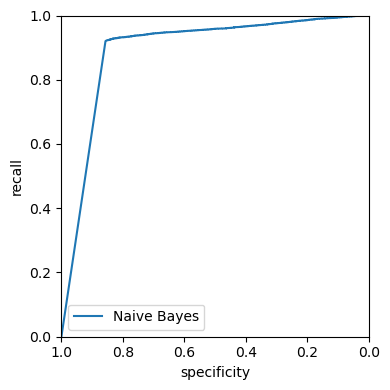

In [16]:
# Naive Bayes ROC curve
fpr_nb, tpr_nb, _ = roc_curve(y, naive_model.predict_proba(X_naive)[:, 0], pos_label=0)
roc_nb = pd.DataFrame({'recall': tpr_nb, 'specificity': 1 - fpr_nb})

# Plotting
ax = roc_nb.plot(x='specificity', y='recall', label='Naive Bayes', figsize=(4, 4))
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
plt.tight_layout()
plt.legend()
plt.show()

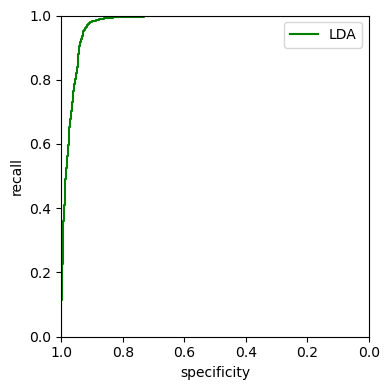

In [17]:
# LDA ROC curve
fpr_lda, tpr_lda, _ = roc_curve(y, lda.predict_proba(X)[:, 0], pos_label=0)
roc_lda = pd.DataFrame({'recall': tpr_lda, 'specificity': 1 - fpr_lda})

#Plotting
ax = roc_lda.plot(x='specificity', y='recall', label='LDA', figsize=(4, 4), color='green')
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
plt.tight_layout()
plt.legend()
plt.show()

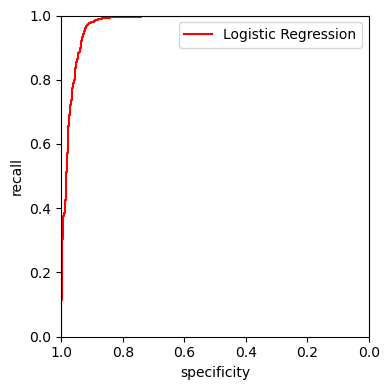

In [18]:
# Logistic Regression ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y, logit_reg.predict_proba(X)[:, 0], pos_label=0)
roc_lr = pd.DataFrame({'recall': tpr_lr, 'specificity': 1 - fpr_lr})

# Plotting
ax = roc_lr.plot(x='specificity', y='recall', label='Logistic Regression', figsize=(4, 4), color='red')
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
plt.tight_layout()
plt.legend()
plt.show()

In [19]:
# AUC value for naive Bayes
roc_auc_score(y, naive_model.predict_proba(X_naive)[:, 1])

0.9338353590695402

In [20]:
# AUC value for LDA
roc_auc_score(y, lda.predict_proba(X)[:, 1])

0.9747194035416852

In [21]:
# AUC value for Logistic Regression
roc_auc_score(y, logit_reg.predict_proba(X)[:, 1])

0.9757174334121083

Logistic Regression gave the best results overall, with a strong confusion matrix and the highest number of correct classifications. LDA also performed well, while Naive Bayes showed the weakest performance, likely due to its assumption that features are independent.

The AUC values were low for all models, which may be due to how the positive class was defined. Some features are clearly more important (such as excess kurtosis), and many of them are correlated. The models could be improved by reducing overlap or using some sort of feature selection.